# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** NETANEL DANUR WENDRA
- **Email:** netaneldnw@gmail.com
- **ID Dicoding:** nettaanell_UcJF

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berubah sepanjang waktu (hari, bulan, musim dan tahun)? dan bagaimana peningkatan atau penurunan penggunaan sepeda dari tahun 2011 ke 2012?
- Bagaimana kondisi cuaca, kelembapan, dan kecepatan memengaruhi jumlah penyewaan sepeda? dan adakah korelasi antara suhu (temp, atemp) dengan jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv(".\data\day.csv")
hour_df = pd.read_csv(".\data\hour.csv")

day_hour_df = pd.merge(
    left = day_df,
    right = hour_df,
    how = "left",
    left_on="dteday",
    right_on="dteday"
)
day_hour_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mendapatkan dua buah dataset yang berisikan data mentah
- Menggabungkan dua buah dataset mentah sebagai satu tabel
- Hal ini dilakukan untuk mempermudah dua buah sampel tabel dataset agar dapat diolah dengan cepat dengan menggabungkan dua buah tabel tersebut berdasarkan hari

### Assessing Data

Menilai masing - masing tabel

In [3]:
hour_df.info()
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
day_df.info()
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai dua buah tabel yang telah digabungkan

In [5]:
day_hour_df.info()
print("\n")
print(day_hour_df.isna().sum())
print("\n Jumlah duplikasi: ", day_hour_df.duplicated().sum(), "\n")
day_hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant_x     17379 non-null  int64  
 1   dteday        17379 non-null  object 
 2   season_x      17379 non-null  int64  
 3   yr_x          17379 non-null  int64  
 4   mnth_x        17379 non-null  int64  
 5   holiday_x     17379 non-null  int64  
 6   weekday_x     17379 non-null  int64  
 7   workingday_x  17379 non-null  int64  
 8   weathersit_x  17379 non-null  int64  
 9   temp_x        17379 non-null  float64
 10  atemp_x       17379 non-null  float64
 11  hum_x         17379 non-null  float64
 12  windspeed_x   17379 non-null  float64
 13  casual_x      17379 non-null  int64  
 14  registered_x  17379 non-null  int64  
 15  cnt_x         17379 non-null  int64  
 16  instant_y     17379 non-null  int64  
 17  season_y      17379 non-null  int64  
 18  yr_y          17379 non-nu

,instant_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,atemp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari hasil penilaian data berdasarkan dua buah tabel tersebut, didapatkan dua buah sampel yang yang cukup baik yakni tidak adanya data yang kosong (Nan atau none) maupun baris yang terduplikasi.
- Melalui method describe yang digunakan, mendapatkan nilai - nilai distribusi data.

### Cleaning Data

Mengecek kembali nilai dan jumlah data tersebut sudah tepat

In [6]:
print("Nilai data NaN Hour", hour_df.isna().sum())
print("Nilai data NaN Day", day_df.isna().sum())
print("\nJumlah data Day ", len(day_df),"\nJumlah data Hour ",len(hour_df))

Nilai data NaN Hour instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Nilai data NaN Day instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah data Day  731 
Jumlah data Hour  17379


In [7]:
day_hour_df.drop_duplicates(inplace=True)
print("Panjang Data:", len(day_hour_df))
day_hour_df.head()
##day_hour_df.to_csv('hasil_gabungan.csv', index=False)

Panjang Data: 17379


,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- berdasarkan pengecekan diatas tidak ditemukan missing value dan data yang terduplikasi dari masing - masing dataset.
- Walaupun data dari hour_df lebih banyak dari day_df, ketika dua data tersebut digabungkan maka otomatis data dari day_df akan menyesuaikan nilai dari hour_df berdasarkan tanggal. Karena nilai ketika digabungkan maka akan mengabil nilai 24 jam perharinya dari hour_df pertanggalnya. Sehingga nilainya tidak ada yang missing. 
- Total nilai tersebut maka akan tetap terdapat sebanyak 17379 buah tanpa missing value ataupun NaN.

## Exploratory Data Analysis (EDA)

### Explore merge dataset

In [9]:
day_hour_df.describe()

,instant_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,atemp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Melakukan explorasi nilai pada dataset hour berdasarkan hari

In [10]:
hour_df.groupby(by="dteday").agg({
    "temp": ["nunique", "max", "min", "mean", "std", ],
    "atemp": ["nunique", "max", "min", "mean", "std", ],
    "windspeed": ["nunique", "max", "min", "mean", "std", ],
    "casual": ["nunique"],
    "registered" : ["nunique"]
})

temp                                   atemp                  \
           nunique   max   min      mean       std nunique     max     min   
dteday                                                                       
2011-01-01      10  0.46  0.20  0.344167  0.096545      10  0.4545  0.2576   
2011-01-02      12  0.46  0.22  0.363478  0.066511      11  0.4545  0.2121   
2011-01-03       7  0.26  0.14  0.196364  0.041696      11  0.2576  0.1061   
2011-01-04       9  0.30  0.12  0.200000  0.057525       8  0.2879  0.1364   
2011-01-05       8  0.30  0.16  0.226957  0.042043       7  0.3182  0.1818   
...            ...   ...   ...       ...       ...     ...     ...     ...   
2012-12-27       4  0.30  0.24  0.254167  0.019092       5  0.2727  0.1970   
2012-12-28       5  0.30  0.22  0.253333  0.026811       7  0.3182  0.2121   
2012-12-29       5  0.30  0.20  0.253333  0.029291       1  0.2424  0.2424   
2012-12-30       7  0.34  0.20  0.255833  0.032826       7  0.3636  0.1970   
2012-12-31       8  0.28  0.14  0.215833  0.050036       8  0.2879  0.1515   

                               windspeed                                      \
                mean       std   nunique     max     min      mean       std   
dteday                                                                         
2011-01-01  0.363625  0.075015         7  0.2985  0.0000  0.160446  0.134091   
2011-01-02  0.353739  0.074160        10  0.4478  0.1343  0.248539  0.075930   
2011-01-03  0.189405  0.047617        12  0.4179  0.0000  0.248309  0.112696   
2011-01-04  0.212122  0.051490        10  0.3284  0.0000  0.160296  0.079763   
2011-01-05  0.229270  0.036919         9  0.3284  0.0000  0.186900  0.099911   
...              ...       ...       ...     ...     ...       ...       ...   
2012-12-27  0.226642  0.020208        11  0.5224  0.1642  0.350133  0.116695   
2012-12-28  0.255046  0.030516         9  0.2836  0.0000  0.155471  0.067882   
2012-12-29  0.242400  0.000000         9  0.5522  0.0000  0.124383  0.161681   
2012-12-30  0.231700  0.036145        13  0.6567  0.0000  0.350754  0.148991   
2012-12-31  0.223487  0.047127         6  0.2239  0.0896  0.154846  0.035697   

            casual registered  
           nunique    nunique  
dteday                         
2011-01-01      17         20  
2011-01-02      12         19  
2011-01-03      10         21  
2011-01-04      12         21  
2011-01-05       9         21  
...            ...        ...  
2012-12-27      14         23  
2012-12-28      19         23  
2012-12-29      16         22  
2012-12-30      15         22  
2012-12-31      20         23  

[731 rows x 17 columns]

### Melakukan explorasi nilai pada dataset day berdasarkan bulan

In [11]:
day_df.groupby(by="mnth").agg({
    "temp": ["nunique", "max", "min", "mean", "std", ],
    "atemp": ["nunique", "max", "min", "mean", "std", ],
    "windspeed": ["nunique", "max", "min", "mean", "std", ],
    "casual": ["nunique", "mean"],
    "registered" : ["nunique","mean"]
})

temp                                           atemp            \
     nunique       max       min      mean       std nunique       max   
mnth                                                                     
1         57  0.425000  0.059130  0.236444  0.083266      62  0.415383   
2         54  0.521667  0.127500  0.299226  0.084314      56  0.511983   
3         61  0.601667  0.198333  0.390539  0.104674      61  0.570067   
4         56  0.664167  0.300000  0.469999  0.087255      59  0.614925   
5         56  0.775000  0.414167  0.594798  0.072999      62  0.725383   
6         53  0.834167  0.540833  0.684097  0.066094      59  0.786613   
7         57  0.861667  0.595833  0.755470  0.051950      60  0.840896   
8         54  0.793333  0.635833  0.708582  0.039913      61  0.751267   
9         52  0.753333  0.469167  0.616485  0.061916      60  0.708983   
10        58  0.657500  0.254167  0.485012  0.084009      62  0.607975   
11        55  0.530000  0.245833  0.369220  0.064527      60  0.524612   
12        56  0.475833  0.215833  0.324031  0.067852      62  0.469054   

                                   windspeed                                \
           min      mean       std   nunique       max       min      mean   
mnth                                                                         
1     0.079070  0.239796  0.082071        62  0.415429  0.073396  0.206303   
2     0.101658  0.299731  0.082139        57  0.507463  0.045408  0.215684   
3     0.200133  0.381954  0.100767        60  0.441563  0.089558  0.222699   
4     0.283454  0.457081  0.079400        59  0.388067  0.065929  0.234482   
5     0.404650  0.565662  0.059507        62  0.342667  0.074637  0.182989   
6     0.525892  0.638246  0.055332        60  0.347642  0.077125  0.185420   
7     0.549912  0.704094  0.055027        62  0.284813  0.080850  0.166059   
8     0.242400  0.651475  0.064561        61  0.375617  0.070283  0.172918   
9     0.461475  0.579299  0.052444        58  0.357587  0.050379  0.165945   
10    0.227913  0.471973  0.074780        60  0.422275  0.022392  0.175205   
11    0.248742  0.367359  0.063580        60  0.376871  0.046650  0.183801   
12    0.220333  0.326160  0.067330        61  0.407346  0.047275  0.176609   

                casual              registered               
           std nunique         mean    nunique         mean  
mnth                                                         
1     0.080048      57   194.225806         61  1982.112903  
2     0.090922      52   262.508772         57  2392.789474  
3     0.077962      60   716.838710         61  2975.419355  
4     0.077204      60  1013.366667         60  3471.533333  
5     0.063039      62  1214.274194         61  4135.500000  
6     0.061183      56  1231.766667         58  4540.600000  
7     0.043746      61  1260.596774         60  4303.080645  
8     0.064354      58  1161.919355         61  4502.500000  
9     0.066339      59  1172.050000         60  4594.466667  
10    0.086656      62   963.870968         62  4235.354839  
11    0.085289      57   610.050000         60  3637.133333  
12    0.087777      60   349.887097         62  3053.919355

### Explorasi Perbandingan Pengguna Casual vs Registered per bulannya berdasarkan tahun

         casual   registered
yr                          
0    677.402740  2728.358904
1   1018.483607  4581.450820


<Figure size 1000x600 with 0 Axes>

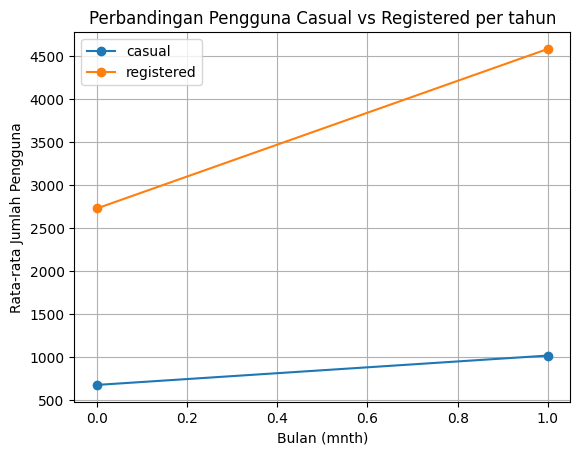

In [12]:
comparison = day_df.groupby('yr')[['casual', 'registered']].mean()
print(comparison)

plt.figure(figsize=(10, 6))
comparison.plot(kind='line', marker='o')
plt.title('Perbandingan Pengguna Casual vs Registered per tahun')
plt.xlabel('Bulan (mnth)')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.grid()
plt.show()

### Distribusi Jumlah Penyewaan Sepeda:

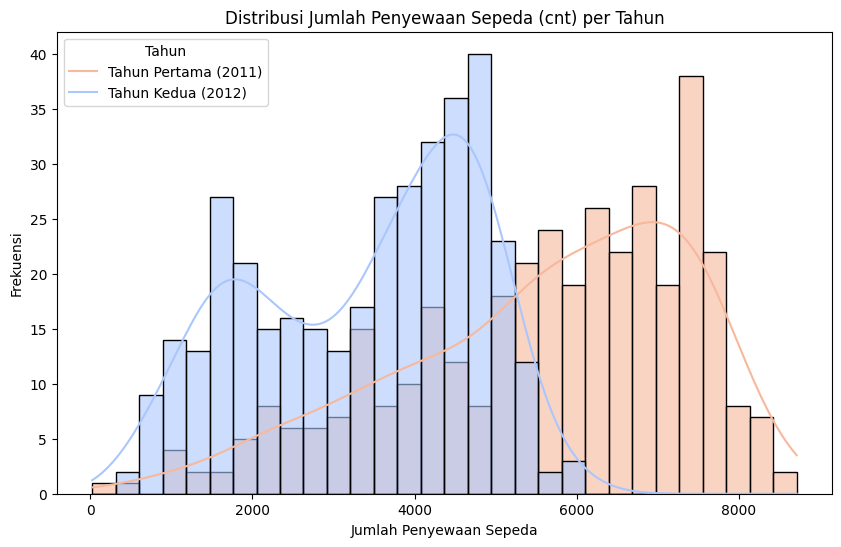

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=day_df, x='cnt', bins=30, kde=True, hue='yr', palette='coolwarm', alpha=0.6)
plt.title('Distribusi Jumlah Penyewaan Sepeda (cnt) per Tahun')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.legend(title='Tahun', labels=['Tahun Pertama (2011)', 'Tahun Kedua (2012)'])
plt.show()

### Pola Penggunaan Sepeda per Musim dalam berdasarkan tahun

<Figure size 1000x600 with 0 Axes>

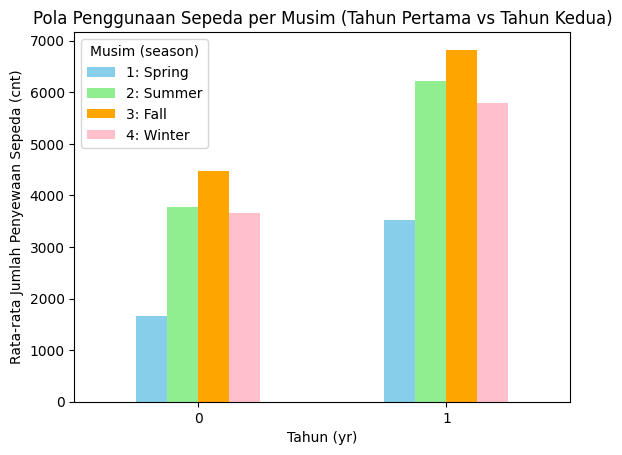

In [14]:
seasonal = day_df.groupby(['yr', 'season'])['cnt'].mean().unstack()

plt.figure(figsize=(10, 6))
seasonal.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.title('Pola Penggunaan Sepeda per Musim (Tahun Pertama vs Tahun Kedua)')
plt.xlabel('Tahun (yr)')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda (cnt)')
plt.xticks(rotation=0)
plt.legend(title='Musim (season)', labels=['1: Spring', '2: Summer', '3: Fall', '4: Winter'])
plt.show()

**Insight:**
- Berdasarkan eksplorasi data, dilakukan metode describe() untuk megetahui kriteria - kriteria nilai berdasarkan masing - masing kolom yang terdapat pada merge dataset.
- Dari eksplorasi yang dilakukan, didapatkan hasil - hasil eksplorasi seperti perbandingan antara pengguna yang terigistrasi, distribusi data pola penggunaan speda dalam tahunnya serta lainnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

#### Tren Harian (day_df)

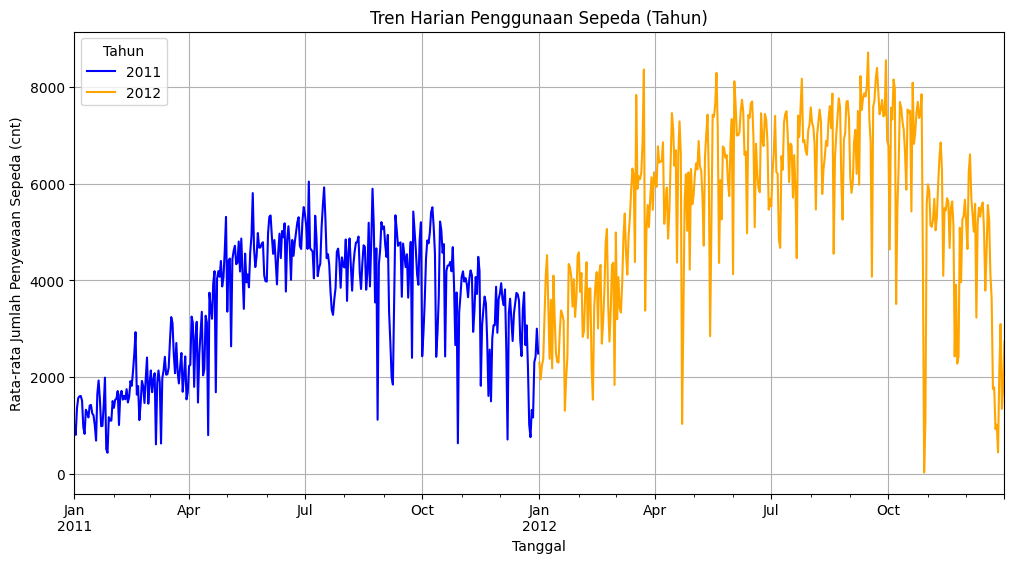

In [28]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
trend_2011 = day_df[day_df['yr'] == 0].groupby('dteday')['cnt'].mean()
trend_2012 = day_df[day_df['yr'] == 1].groupby('dteday')['cnt'].mean()
plt.figure(figsize=(12, 6))
trend_2011.plot(kind='line', label='2011', color='blue')
trend_2012.plot(kind='line', label='2012', color='orange')
plt.title('Tren Harian Penggunaan Sepeda (Tahun)')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda (cnt)')
plt.legend(title='Tahun')
plt.grid()
plt.show()

#### Tren Bulanan (day_df)

mnth           1            2            3            4            5   \
yr                                                                      
0     1231.903226  1721.964286  2065.967742  3162.333333  4381.322581   
1     3120.774194  3556.448276  5318.548387  5807.466667  6318.225806   

mnth           6            7            8            9            10  \
yr                                                                      
0     4783.733333  4559.387097  4409.387097  4247.266667  3984.225806   
1     6761.000000  6567.967742  6919.451613  7285.766667  6414.225806   

mnth           11           12  
yr                              
0     3405.566667  2816.870968  
1     5088.800000  3990.741935  


<Figure size 1200x600 with 0 Axes>

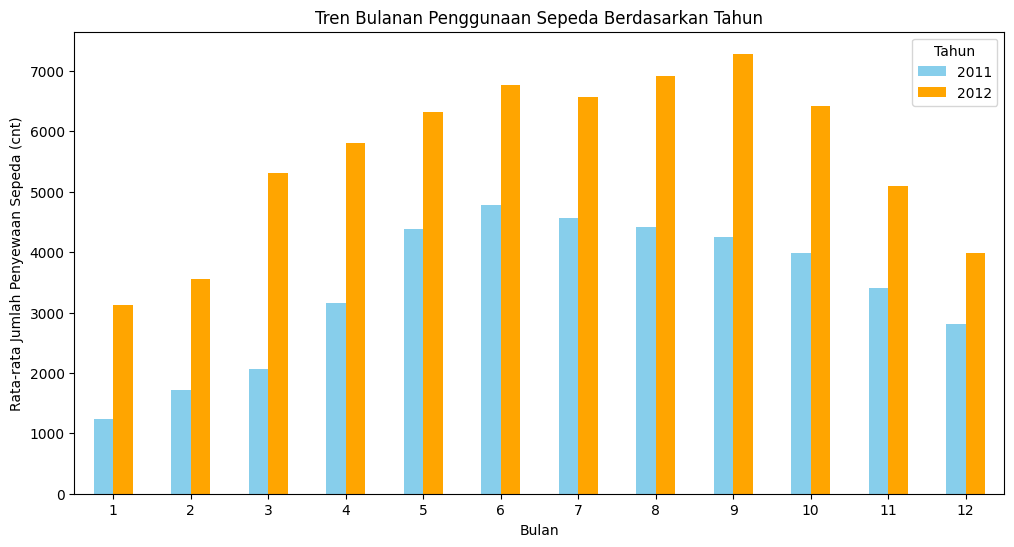

<Figure size 1200x600 with 0 Axes>

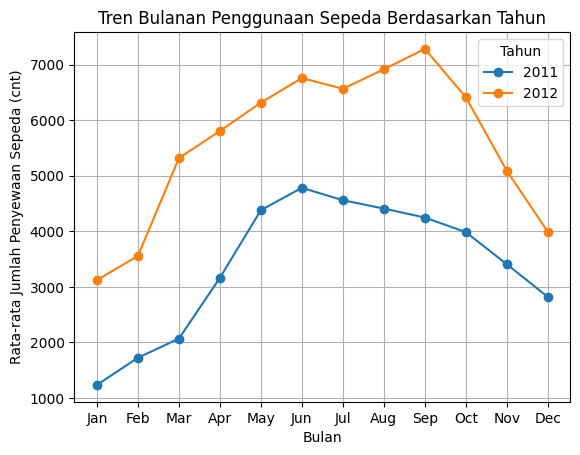

In [29]:
monthly_trend = day_df.groupby(['yr', 'mnth'])['cnt'].mean().unstack()
print(monthly_trend)
plt.figure(figsize=(12, 6))
monthly_trend.T.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.title('Tren Bulanan Penggunaan Sepeda Berdasarkan Tahun')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda (cnt)')
plt.xticks(rotation=0)
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.show()

plt.figure(figsize=(12, 6))
monthly_trend.T.plot(kind='line', marker='o')
plt.title('Tren Bulanan Penggunaan Sepeda Berdasarkan Tahun')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda (cnt)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.grid()
plt.show()

#### Tren Musiman (day_df)

season            1            2            3            4
yr                                                        
0       1666.666667  3775.173913  4464.361702  3664.460674
1       3531.296703  6209.489130  6824.244681  5791.865169


<Figure size 1200x600 with 0 Axes>

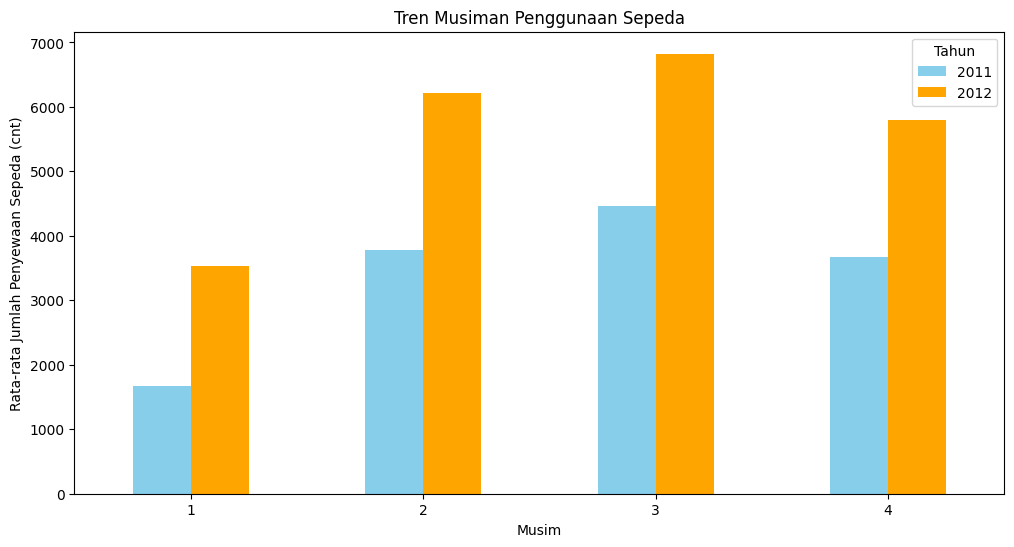

In [30]:
seasonal_trend = day_df.groupby(['yr','season'])['cnt'].mean().unstack()
print(seasonal_trend)
plt.figure(figsize=(12, 6))
seasonal_trend.T.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.title('Tren Musiman Penggunaan Sepeda')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda (cnt)')
plt.xticks(rotation=0)
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.show()

#### Tren Tahunan (day_df)

yr
0    3405.761644
1    5599.934426
Name: cnt, dtype: float64


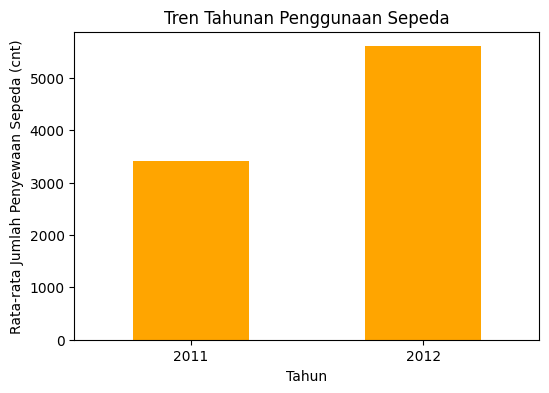

In [31]:
yearly_trend = day_df.groupby('yr')['cnt'].mean()
print(yearly_trend)
yearly_trend.index = [2011, 2012]
plt.figure(figsize=(6, 4))
yearly_trend.plot(kind='bar', color='orange')
plt.title('Tren Tahunan Penggunaan Sepeda')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda (cnt)')
plt.xticks(rotation=0)
plt.show()


#### Tren Peningkatan atau Penurunan per Tahun (day_df)

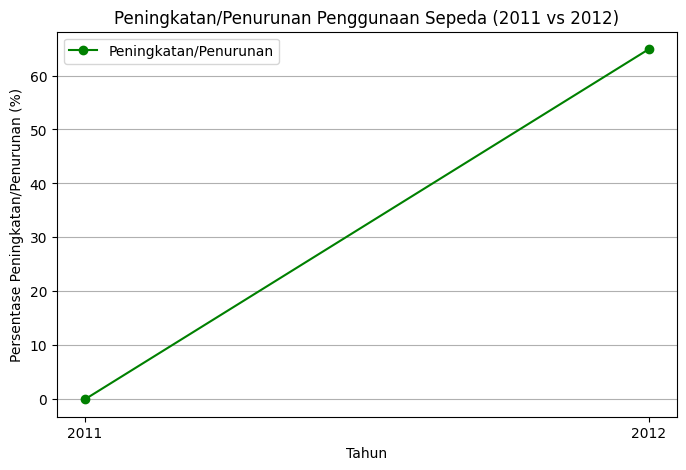

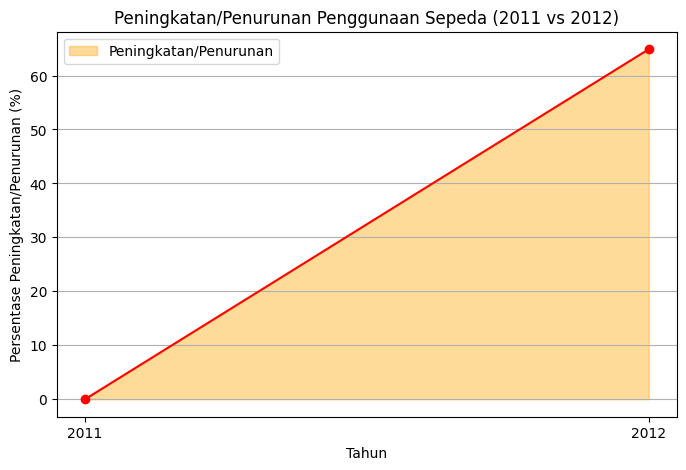

In [32]:
yearly_total = day_df.groupby('yr')['cnt'].sum()
peningkatan = ((yearly_total[1] - yearly_total[0]) / yearly_total[0]) * 100
years = ['2011', '2012']
peningkatan_data = [0, peningkatan]  

plt.figure(figsize=(8, 5))
plt.plot(years, peningkatan_data, marker='o', linestyle='-', color='green', label='Peningkatan/Penurunan')
plt.title('Peningkatan/Penurunan Penggunaan Sepeda (2011 vs 2012)')
plt.xlabel('Tahun')
plt.ylabel('Persentase Peningkatan/Penurunan (%)')
plt.grid(axis='y')  
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.fill_between(years, peningkatan_data, color='orange', alpha=0.4, label='Peningkatan/Penurunan')
plt.plot(years, peningkatan_data, marker='o', linestyle='-', color='red')
plt.title('Peningkatan/Penurunan Penggunaan Sepeda (2011 vs 2012)')
plt.xlabel('Tahun')
plt.ylabel('Persentase Peningkatan/Penurunan (%)')
plt.grid(axis='y')  
plt.legend()
plt.show()

### Pertanyaan 2:

#### Pengaruh Cuaca, Kelembapan, dan Kecepatan Angin memengaruhi jumlah penyewaan sepeda

C:\Users\Nettaanell\AppData\Local\Temp\ipykernel_6772\1822293586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=day_df, palette="Blues")


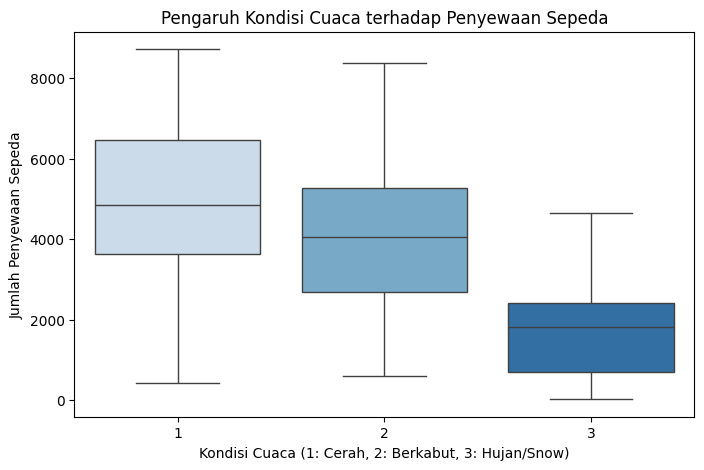

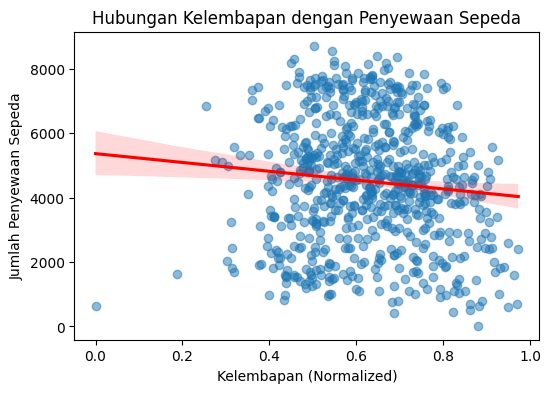

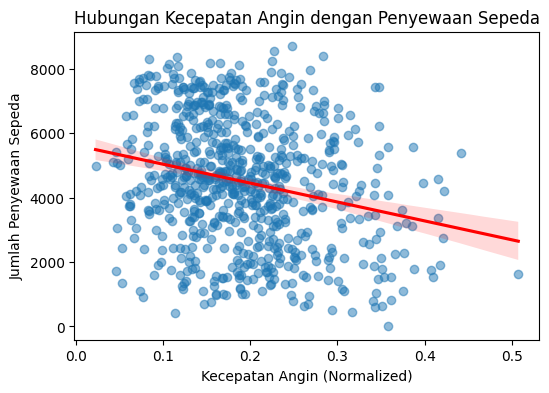

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='weathersit', y='cnt', data=day_df, palette="Blues")
plt.title("Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca (1: Cerah, 2: Berkabut, 3: Hujan/Snow)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

plt.figure(figsize=(6, 4))
sns.regplot(x='hum', y='cnt', data=day_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Hubungan Kelembapan dengan Penyewaan Sepeda")
plt.xlabel("Kelembapan (Normalized)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

plt.figure(figsize=(6, 4))
sns.regplot(x='windspeed', y='cnt', data=day_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Hubungan Kecepatan Angin dengan Penyewaan Sepeda")
plt.xlabel("Kecepatan Angin (Normalized)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()


#### Korelasi Suhu dengan Penyewaan Sepeda

Korelasi antara Temperature (temp) dan Penyewaan Sepeda: 0.63
Korelasi antara Feel-like Temperature (atemp) dan Penyewaan Sepeda: 0.63


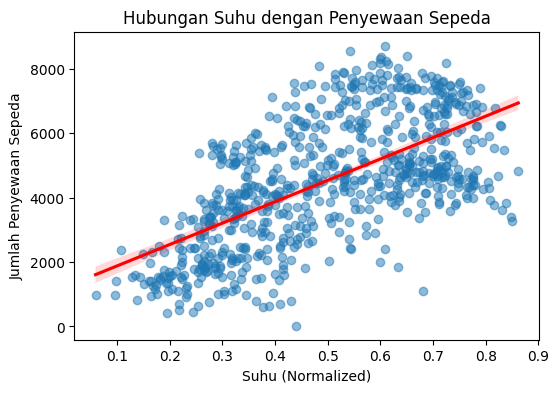

In [34]:
correlation_temp, _ = pearsonr(day_df['temp'], day_df['cnt'])
correlation_atemp, _ = pearsonr(day_df['atemp'], day_df['cnt'])

print(f"Korelasi antara Temperature (temp) dan Penyewaan Sepeda: {correlation_temp:.2f}")
print(f"Korelasi antara Feel-like Temperature (atemp) dan Penyewaan Sepeda: {correlation_atemp:.2f}")

plt.figure(figsize=(6, 4))
sns.regplot(x='temp', y='cnt', data=day_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Hubungan Suhu dengan Penyewaan Sepeda")
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

**Insight:**
    **Pertanyaan 1**
        - Pola penggunaan sepeda dipengaruhi oleh musim dan cuaca, dengan puncak penggunaan pada musim panas dan musim gugur
        - Terdapat pola harian dan bulanan menunjukkan fluktuasi penggunaan sepeda, dengan peningkatan pada hari tertentu dan bulan tertentu.
        - Terjadi peningkatan signifikan pengguna sepeda dari tahun 2011 ke 2012 diatas 60%
        - Hal tersebut dapat dipengaruhi Cuaca & Waktu
    **Pertanyaan 2**
        - Boxplot menunjukan bahwa kondisi cuaca yang lebih cerah memiliki jumlah penyewaan sepeda yang lebih tinggi dibanding  kondisi berkabut dan hujan/salju. Semakin buruk kondisi cuaca, penyewaan sepeda cenderung menurun
        - Scatter plot dengan regresi menunjukkan bahwa kelembapan memiliki korelasi negatif terhadap jumlah penyewaan sepeda.
        - Terdapat korelasi negatif antara kecepatan angin dan jumlah penyewaan sepeda. Semakin tinggi kecepatan angin, jumlah penyewaan sepeda berkurang.
        - Scatter plot menunjukkan suhu memiliki korelasi positif dengan jumlah penyewaan sepeda. Semakin tinggi suhu dalam rentang nyaman, semakin banyak sepeda disewa.

## Analisis Lanjutan (Opsional)

### RFM Analysis
- Recency, Jumlah hari sejak terakhir kali pengguna menyewa sepeda
- Frequency, Jumlah total penyewaan sepeda oleh pengguna
- Monetary, Total nilai penyewaan sepeda

In [15]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
last_date = hour_df['dteday'].max()
hour_df['Recency'] = (last_date - hour_df['dteday']).dt.days

hour_df['Frequency'] = hour_df.groupby('instant')['instant'].transform('count')

hour_df['Monetary'] = hour_df['cnt']

hour_df['RFM_Score'] = hour_df['Recency'] + hour_df['Frequency'] + hour_df['Monetary']

print(hour_df[['dteday', 'Recency', 'Frequency', 'Monetary', 'RFM_Score']].head())

      dteday  Recency  Frequency  Monetary  RFM_Score
0 2011-01-01      730          1        16        747
1 2011-01-01      730          1        40        771
2 2011-01-01      730          1        32        763
3 2011-01-01      730          1        13        744
4 2011-01-01      730          1         1        732


### Clustering

#### Manual Grouping:
Pengelompokkan pengguna berdasarkan jumlah penyewaan (cnt) ke dalam kategori:
- Low: cnt < 100
- Medium: 100 <= cnt < 500
-  High: cnt >= 500

In [45]:
day_df['Usage_Category'] = pd.cut(day_df['cnt'], bins=[0, 100, 500, float('inf')], labels=['Low', 'Medium', 'High'])
day_df_sorted = day_df.sort_values(by='Usage_Category')
print(day_df_sorted[['dteday', 'cnt', 'Usage_Category']].head())

        dteday   cnt Usage_Category
667 2012-10-29    22            Low
26  2011-01-27   431         Medium
725 2012-12-26   441         Medium
0   2011-01-01   985           High
482 2012-04-27  6233           High


#### Membagi suhu (temp) ke dalam interval tertentu:
- Cold: temp < 0.3
- Mild: 0.3 <= temp < 0.6
- Hot: temp >= 0.6

In [44]:
day_df['Temp_Category'] = pd.cut(day_df['temp'], bins=[0, 0.3, 0.6, 1], labels=['Cold', 'Mild', 'Hot'])
day_df_sorted2 = day_df.sort_values(by='Temp_Category')
print(day_df[['dteday', 'temp', 'Temp_Category']].head())

      dteday      temp Temp_Category
0 2011-01-01  0.344167          Mild
1 2011-01-02  0.363478          Mild
2 2011-01-03  0.196364          Cold
3 2011-01-04  0.200000          Cold
4 2011-01-05  0.226957          Cold


## Conclusion

**Kesimpulan:**  
**Pertanyaan 1 :**Pola penggunaan sepeda menunjukkan bahwa faktor musim dan cuaca sangat memengaruhi jumlah penyewaan, dengan puncak tertinggi terjadi pada musim panas dan musim gugur. Selain itu, terdapat pola harian dan bulanan yang menunjukkan fluktuasi penggunaan sepeda, dengan peningkatan pada hari dan bulan tertentu. Secara keseluruhan, jumlah penyewaan sepeda mengalami peningkatan signifikan lebih dari 60% dari tahun 2011 ke 2012, yang kemungkinan dipengaruhi oleh faktor cuaca dan waktu.  

**Pertanyaan 2 :**Dari analisis lebih lanjut, kondisi cuaca cerah meningkatkan jumlah penyewaan sepeda dibandingkan dengan kondisi berkabut atau hujan. Selain itu, kelembapan dan kecepatan angin memiliki korelasi negatif terhadap penyewaan sepeda, di mana peningkatan keduanya cenderung menurunkan jumlah peminjam. Sebaliknya, suhu menunjukkan korelasi positif, di mana suhu yang lebih hangat dalam rentang nyaman mendorong lebih banyak orang untuk menggunakan sepeda.  

**Rekomendasi:**  
Untuk meningkatkan jumlah penyewaan sepeda, penyedia layanan dapat memanfaatkan tren musiman dengan menawarkan promosi khusus selama musim panas dan musim gugur. Selain itu, penyedia dapat menyediakan fasilitas tambahan untuk mengurangi dampak cuaca buruk. Informasi cuaca real-time dapat ditampilkan penyewaan sepeda untuk membantu pengguna merencanakan perjalanan mereka dengan lebih baik.